# ピアソンの相関係数と、その分母分子を理解する(2022/01/05-2022/01/06)
---
このnotebookでは，ピアソンの相関係数について理解し，Pythonによる実装までを記録する．

## ピアソンの相関係数とは
---
ピアソンの積率相関係数(Pearson product moment correlation coefficient)を指す．2つの確率変数の類似性を指す指標であり，-1から1までの間の実数値をとる．1に近いときは正の相関，-1に近いときは負の相関があるとする．0に近いときは相関がないとする．直線的(線形)調べることに用いられる標本相関係数(sample correlation coefficient)である．

この相関係数は，必ずしも因果関係を示すものではない．例えば，2変数XとYの間で強い正の相関があるとする．このとき，「ある事象から発生したXの値xは，Yの値yによるものだ」と考えるのは必ずしも正しくない．

相関係数を見ると非常に高い相関を示しているが，実際には変数間に全く相関がないという場合がある．これは疑似相関と呼ばれる．例えばWikipediaを参照すると「アイスクリームの売り上げとプールでの溺死事故件数」が挙げられている．疑似相関では，潜在変数がある．先述の例では「夏の暑さ」が挙げられていた．因果的な効果の推定には，統計的因果推論などに基づいた調査が必要になる．

また，相関係数は順序尺度であり比尺度ではないので，「前者は後者より2倍の相関がある」という表現はできない．偶然得られた強い相関から，事前仮説を訂正して事象を論じる「HARKing」にも注意が必要である．

このほかの相関係数には，曲線的(非線形)な相関や単調増加/減少関係の相関を調べる順位相関係数(rank correlation coefficient)がある．例えば以下：
- スピアマンの順位相関係数(Spearman's rank correration coefficient)
- ケンドールの順位相関係数(Kendall rank correration coefficient, Kendall's T coefficient)

2つ挙げた順位相関係数は，スピアマンの方が多用される．

ピアソンの積率相関係数の検定は，偏差の正規分布を仮定する(パラメトリック)方法である．そのため，このような過程を置かない(ノンパラメトリックな)手法として上記の順位相関係数を用いることがある．

## ピアソンの積率相関係数の定義
---
別名「標本相関係数」と言われるように，2種のデータセット$(x_1, x_2, ..., x_n), (y_1, y_2,... ,y_n)$が与えられたとする．標本共分散を$s_{xy}$，標本標準偏差をそれぞれ$s_x, s_y$とする．このとき，以下のようにピアソンの積率相関係数は定義される：

$$
r = \frac{s_{xy}}{s_xs_y} = \frac{\sum^{n}_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum^{n}_{i=1}(x_i-\bar{x})^2}\sqrt{\sum^{n}_{i=1}(y_i-\bar{y})^2}}
$$

$\bar{x}$と$\bar{y}$は各データセットの標本平均であり，$\bar{x}=\frac{\sum^{n}_{i=1}x_i}{n}, \bar{y}=\frac{\sum^{n}_{i=1}y_i}{n}$である．


## ピアソンの積率相関係数の分子について
---
「正の相関がある」という場合，変数xが大きくなると変数yも大きくなる傾向にあるということである．「負の相関がある」という場合はその逆で，変数xが大きくなると変数yが小さくなる傾向にある．ピアソンの積率相関係数では，このことが先の定義の分子で表現されている．

先の定義で，分子は標本共分散で表されるとした．改めて標本共分散を以下に記す：

$$
s_{xy} = \sum^{n}_{i=1}(x_i-\bar{x})(y_i-\bar{y})
$$

ここで$(x_i-\bar{x})$と$(y_i-\bar{y})$の部分に注目する．それぞれのデータ点において標本平均を引いているので，これは中心化が行われている．つまり，平均をとるとゼロになるように値を補正していることになる．一言でいえば偏差を計算している．値の平均(中心)からプラスかマイナスか，どれだけずれているかをデータ点ごとに求めていることになる．

ここで，仮にxとyの間に正の相関があるとする．つまりピアソンの積率相関係数は0より大きい値をとる．このとき，変数xが大きくなるということは，言い換えると変数xの偏差がマイナスからゼロを通過してプラスへ移行していく．変数yについても同様のことが言えるため，標本共分散の総和に用いられている各項は以下のいずれかの計算になるはずである：(※訂正※雰囲気としてはそんな感じだが，厳密ではないな...「全ての項の」正負が揃うわけではない)
- (xの偏差：負の値)×(yの偏差：負の値)>0
- (xの偏差：正の値)×(yの偏差：正の値)>0

厳密には偏差ゼロもありうるため，すべての項がゼロ以上の値をとる．結果，標本共分散も正の値をとるということになる．

負の相関の場合も同様である：
- (xの偏差：負の値)×(yの偏差：正の値)<0
- (xの偏差：正の値)×(yの偏差：負の値)<0

以上により，すべての項がゼロ以下の値をとって標本共分散も負の値をとる．

## ピアソンの積率相関係数の分母について
---
ピアソンの積率相関係数の分母は，根号のついた項の積の形になっている．つまり必ず0以上の値をとる(厳密には0より大きい値でなければならない)．したがって，分子の符号がそのまま維持されるので，相関が相関係数の正負の符号として表される．

「では分母は必要ないのではないか？」と考えたが，これはスケール，すなわち尺度を合わせるために加えられている正規化項なのであった．言い換えると，-1から1の間に値が収まるように，補正している．分母のそれぞれの項は，先述の定義より変数xとyの標準偏差である．

## シミュレーション
---
適当なデータセットを用意して，ピアソンの積率相関係数を求めてみる．

### バニラPythonの実装

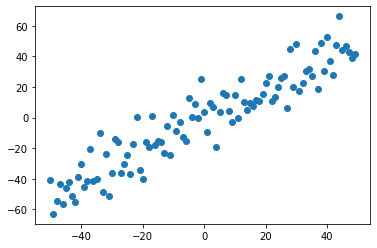

In [1]:
# 直線上の値に，ガウスノイズを乗せてデータセットとする
import math
import random
import matplotlib.pyplot as plt

random.seed(0)

datasets = (
    [i for i in range(-50, 50)],
    [i + random.gauss(0, 10) for i in range(-50, 50)]
)
plt.scatter(datasets[0], datasets[1])

In [2]:
# 標本共分散と標本標準偏差を求める
mean_x = sum(datasets[0])/len(datasets[0])
mean_y = sum(datasets[1])/len(datasets[1])

cov = sum([(datasets[0][i] - mean_x)*(datasets[1][i] - mean_y) for i in range(len(datasets[0]))])

std_x = math.sqrt(sum((datasets[0][i] - mean_x)**2 for i in range(len(datasets[0]))))
std_y = math.sqrt(sum((datasets[1][i] - mean_y)**2 for i in range(len(datasets[1]))))

# ピアソンの積率相関係数を計算
p_corr = cov / (std_x * std_y)
p_corr

0.9369365072811379

### Numpyを用いた実装

In [3]:
# 専用の関数を用いれば一発
import numpy as np

p_corr_numpy = np.corrcoef(datasets[0], datasets[1])

# 行列形式で結果が出ているのは，自分自身との相関も計算しているため(公式ドキュメントを見よ)
p_corr_numpy

array([[1.        , 0.93693651],
       [0.93693651, 1.        ]])

### Pandasを用いた実装

In [4]:
# Seriesに変換してインスタンスメソッドを呼び出す
import pandas as pd

x_series = pd.Series(datasets[0])
y_series = pd.Series(datasets[1])

x_series.corr(y_series)

0.9369365072811372

## 参考文献
---
[Pearsonの相関係数, 実験医学online](https://www.yodosha.co.jp/jikkenigaku/keyword/2676.html#:~:text=%E3%83%94%E3%82%A2%E3%82%BD%E3%83%B3%E3%81%AE%E7%A9%8D%E7%8E%87%E7%9B%B8,%E7%9B%B8%E9%96%A2%E3%81%8C%E3%81%82%E3%82%8B%E3%81%A8%E3%81%99%E3%82%8B%EF%BC%8E)

[相関係数/ピアソンの積率相関係数とは?, ITmedia](https://atmarkit.itmedia.co.jp/ait/articles/2110/13/news027.html)

[疑似相関, Wikipedia](https://ja.wikipedia.org/wiki/%E6%93%AC%E4%BC%BC%E7%9B%B8%E9%96%A2)

[相関係数, Wikipedia](https://ja.wikipedia.org/wiki/%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0)

[Python組み込み関数, 公式ドキュメント](https://docs.python.org/ja/3/library/functions.html)

[Python random, 公式ドキュメント](https://docs.python.org/ja/3/library/random.html)

[numpy.corrcoef, 公式ドキュメント](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)